<a href="https://colab.research.google.com/github/evcereti/Aprendiendo_ML_y_DS/blob/main/regresion_polinomial_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regresión Polinomial

##Importando las librerias a utilizar

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Importando el Dataset

In [138]:
ds = pd.read_csv('car data.csv')

##Análisis Exploratorio de los Datos y limpieza del Dataset

Como siempre, partimos de entender que tipo de dataset nos fue entregado.

In [139]:
ds.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Tenemos 9 columnas, de las cuales 4 son categoricas y 5 son numéricas. En tanto que este es un ejercicio en regresión polinomial, decidimos que la variable continua a predecir debería ser Selling_Price.

Es útil mover Selling_Price hasta el final de la tabla.

In [140]:
ds = pd.concat([ds.drop('Selling_Price', axis=1), ds['Selling_Price']], axis=1)
ds.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0,4.60


In [141]:
ds.shape

(301, 9)

In [142]:
ds.isnull().sum()

,0
Car_Name,0
Year,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0
Selling_Price,0


In [143]:
ds[ds.duplicated(keep=False)]

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
15,ertiga,2016,10.79,43000,Diesel,Dealer,Manual,0,7.75
17,ertiga,2016,10.79,43000,Diesel,Dealer,Manual,0,7.75
51,fortuner,2015,30.61,40000,Diesel,Dealer,Automatic,0,23.00
93,fortuner,2015,30.61,40000,Diesel,Dealer,Automatic,0,23.00


In [144]:
ds = ds.drop_duplicates(keep='first')

In [145]:
ds.shape

(299, 9)

El dataset tiene original tenía 301 puntos muestrales, con 2 duplicados y sin datos faltantes. Después de eliminar los duplicados, nos quedamos con 299 elementos.

In [146]:
ds['Car_Name'].nunique()

98

El dataset tiene 98 modelos de auto únicos. Este número es muy grande en comparación al tamaño del dataset.

Revisamos si es posible disminuir este numero mediante algún tipo de limpieza.

In [147]:
ds['Car_Name'].values

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza', 'ciaz',
       's cross', 'ciaz', 'ciaz', 'alto 800', 'ciaz', 'ciaz', 'ertiga',
       'dzire', 'ertiga', 'ertiga', 'wagon r', 'sx4', 'alto k10', 'ignis',
       'sx4', 'alto k10', 'wagon r', 'swift', 'swift', 'swift',
       'alto k10', 'ciaz', 'ritz', 'ritz', 'swift', 'ertiga', 'dzire',
       'sx4', 'dzire', '800', 'alto k10', 'sx4', 'baleno', 'alto k10',
       'sx4', 'dzire', 'omni', 'ciaz', 'ritz', 'wagon r', 'ertiga',
       'ciaz', 'fortuner', 'fortuner', 'innova', 'fortuner', 'innova',
       'corolla altis', 'etios cross', 'corolla altis', 'etios g',
       'fortuner', 'corolla altis', 'etios cross', 'fortuner', 'fortuner',
       'fortuner', 'etios liva', 'innova', 'fortuner', 'corolla altis',
       'corolla altis', 'etios liva', 'corolla altis', 'corolla altis',
       'etios liva', 'etios cross', 'etios g', 'corolla altis', 'corolla',
       'corolla altis', 'fortuner', 'corolla altis', 'etios gd', 'innova

Aquí vemos que Car_Name contiene Marca y modelo, de forma que debería ser posible separar esta información en dos columnas diferentes. Sin un diccionario de marcas y modelos es muy dificil lograr este objetivo, así que lo mejor es eliminar por completo la variable.

In [148]:
ds = ds.drop('Car_Name', axis=1)

In [149]:
ds.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,2011,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,2014,6.87,42450,Diesel,Dealer,Manual,0,4.60


In [150]:
X = ds.iloc[:, :-1]
y = ds.iloc[:, -1]

In [151]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,Petrol,Dealer,Manual,0
1,2013,9.54,43000,Diesel,Dealer,Manual,0
2,2017,9.85,6900,Petrol,Dealer,Manual,0
3,2011,4.15,5200,Petrol,Dealer,Manual,0
4,2014,6.87,42450,Diesel,Dealer,Manual,0


In [152]:
y.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


Ahora realizamos el One-Hot-Encoding de las variables categóricas.

In [153]:
X = pd.get_dummies(X, ['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)
X.head()

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,5.59,27000,0,False,True,False,True
1,2013,9.54,43000,0,True,False,False,True
2,2017,9.85,6900,0,False,True,False,True
3,2011,4.15,5200,0,False,True,False,True
4,2014,6.87,42450,0,True,False,False,True


Transformamos la columna Year a una columna Age que contenga la antiguedad del vehiculo.

In [154]:
X['Year'] = X['Year'].max() - X['Year']
X.rename(columns={'Year':'Age'}, inplace=True)
X.head()

,Age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,4,5.59,27000,0,False,True,False,True
1,5,9.54,43000,0,True,False,False,True
2,1,9.85,6900,0,False,True,False,True
3,7,4.15,5200,0,False,True,False,True
4,4,6.87,42450,0,True,False,False,True


<Axes: >

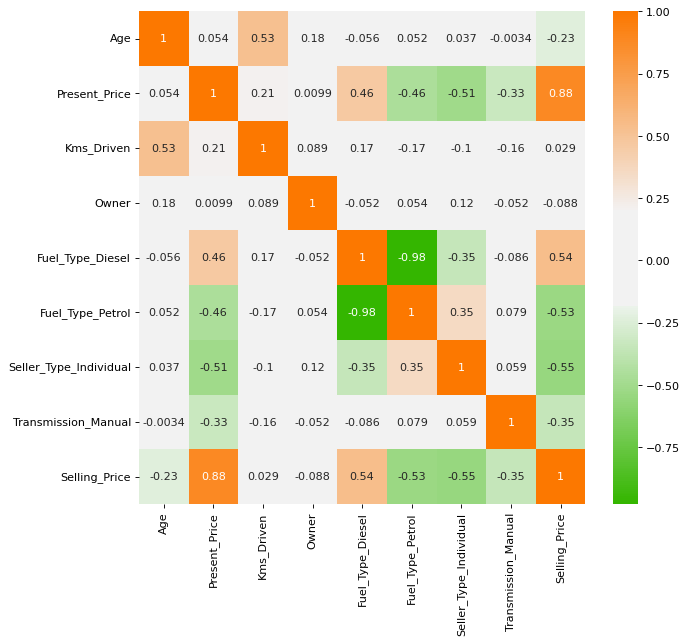

In [155]:
cmap = sns.diverging_palette(125, 28, s=100, l=65, sep=50, as_cmap=True)
fig, ax = plt.subplots(figsize=(9, 8), dpi=80)
sns.heatmap(
    pd.concat([X, y], axis=1).corr(),
    annot=True,
    cmap=cmap
  )

Notamos que existe correlación importante entre Selling_Price, Present_Price, Fuel_Type_Diesel, Fuel_Type_Petrol y Seller_Type_Individual.

Por otro lado, existe multicolinearidad entre los dos Fuel_Type y entre Age y Kms_Driven.

##Construcción del modelo

Comenzamos por separar la matriz de Features y el vector de etiquetas en subconjuntos de Entrenamiento y test.

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)